# Exploratory Data Analysis (EDA) for Vegemite Production Project

In [8]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the datasets
df_good = pd.read_csv('good.csv')
df_lowbad = pd.read_csv('low bad.csv')
df_highbad = pd.read_csv('high bad.csv')

# Add labels
df_good['label'] = 0
df_lowbad['label'] = 1
df_highbad['label'] = 2

# Combine into one dataset
df_full = pd.concat([df_good, df_lowbad, df_highbad], ignore_index=True)
print('Combined dataset shape:', df_full.shape)

Combined dataset shape: (30375, 34)


In [10]:
# Drop non-feature columns
columns_to_drop = ['Batch', 'Yeast', 'Date', 'Time']
df_features = df_full.drop(columns=columns_to_drop, errors='ignore')

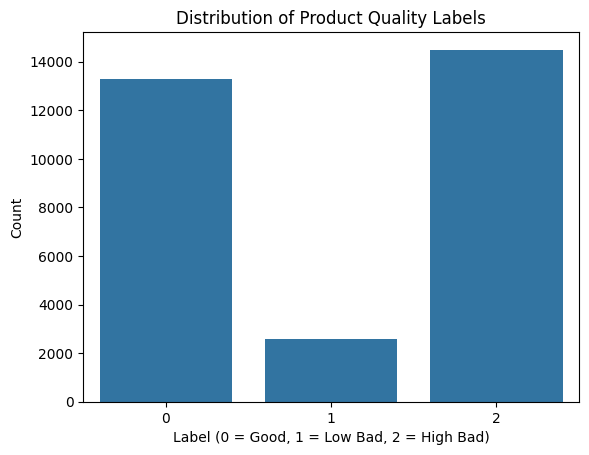

In [11]:
# Class distribution
sns.countplot(x='label', data=df_features)
plt.title('Distribution of Product Quality Labels')
plt.xlabel('Label (0 = Good, 1 = Low Bad, 2 = High Bad)')
plt.ylabel('Count')
plt.show()

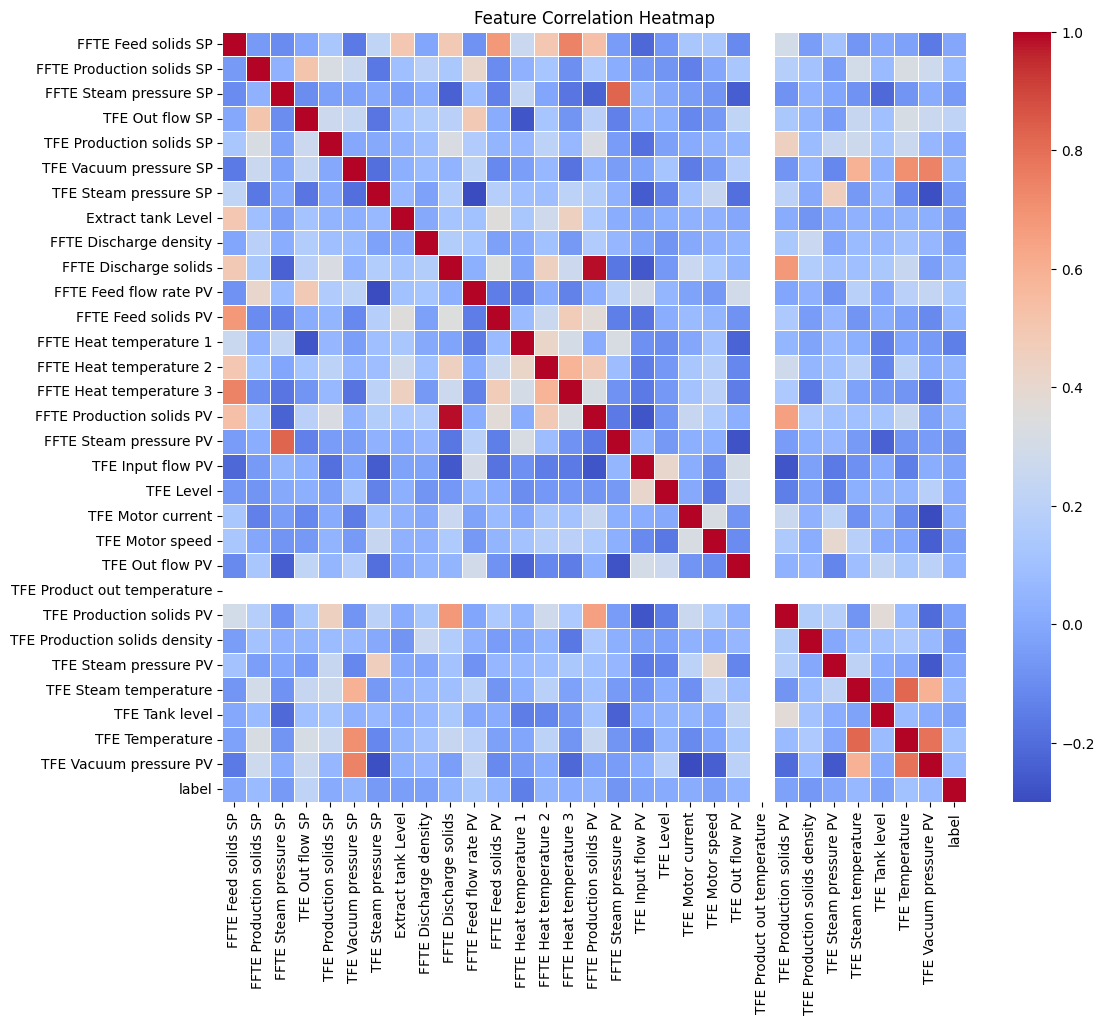

In [12]:
# Correlation heatmap (Fix included)
numeric_features = df_features.select_dtypes(include=['float64', 'int64'])
correlation = numeric_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [13]:
# Feature scaling for modeling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_features)
df_scaled = pd.DataFrame(scaled_data, columns=numeric_features.columns)
df_scaled['label'] = df_features['label'].values

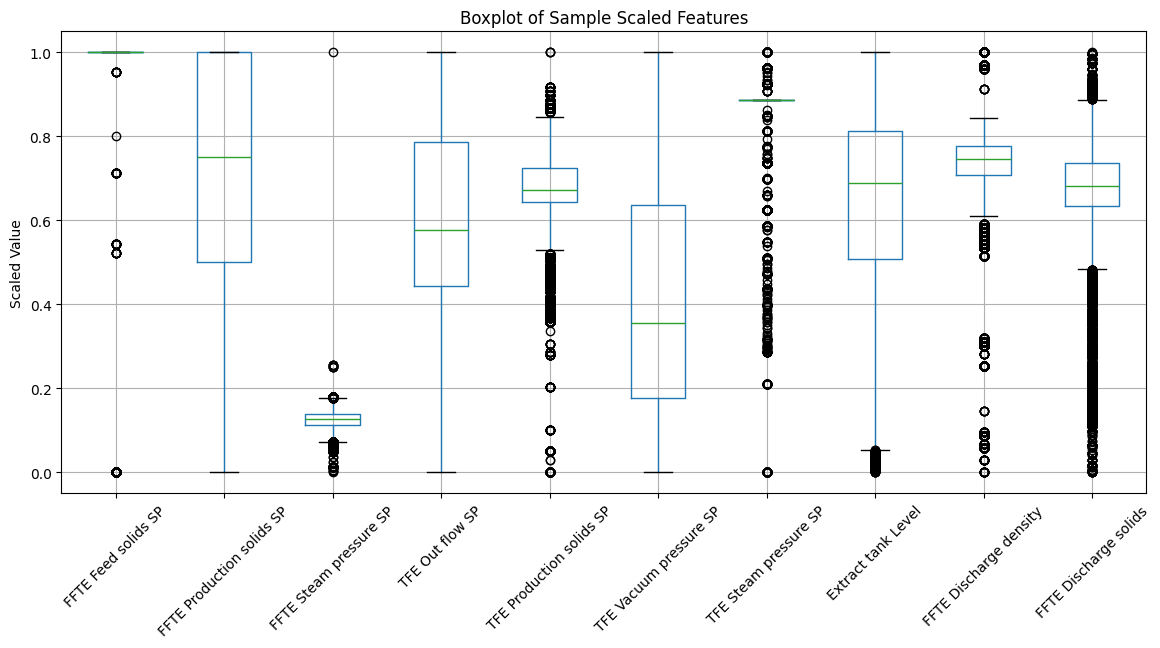

In [14]:
# Boxplot for a sample of features
sample_columns = df_scaled.columns[:10]  # First 10 columns
plt.figure(figsize=(14, 6))
df_scaled[sample_columns].boxplot(rot=45)
plt.title('Boxplot of Sample Scaled Features')
plt.ylabel('Scaled Value')
plt.show()